In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
# import palettable.colorbrewer.diverging as pld
import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

# palette = pld.RdYlGn_4_r
palette = pld.BlueGreen_4_r
cmap = palette.mpl_colormap
# cmap = cmap=plt.get_cmap('tab10')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


In [4]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221121_CsPbBr_growth'
subfolder = glob.glob(cwd + '/CsPbBr_12mM_Cl/**')
subfolder.sort()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221121_CsPbBr_growth/CsPbBr_12mM_Cl/CsPbBr_200uL_Cl_0
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221121_CsPbBr_growth/CsPbBr_12mM_Cl/CsPbBr_200uL_Cl_08
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221121_CsPbBr_growth/CsPbBr_12mM_Cl/CsPbBr_200uL_Cl_16
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221121_CsPbBr_growth/CsPbBr_12mM_Cl/CsPbBr_200uL_Cl_32
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221121_CsPbBr_growth/CsPbBr_12mM_Cl/CsPbBr_200uL_Cl_64


In [5]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

title = ['Insitu CsPb 6mM + Br 12 mM',
         'Insitu CsPb 6mM + Br 12 mM + ZnCl2 8uL/min', 
         'Insitu CsPb 6mM + Br 12 mM + ZnCl2 16uL/min',
         'Insitu CsPb 6mM + Br 12 mM + ZnCl2 32uL/min', 
         'Insitu CsPb 6mM + Br 12 mM + Zncl2 64uL/min']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label = ['CsPbBr',
         'ZnCl2 8 uL/min', 
         'ZnCl2 16 uL/min',
         'ZnCl2 32 uL/min',
         'ZnCl2 64 uL/min']
         # 'ZnI2 128 uL/min']

CsPbBr_200uL_Cl_0
CsPbBr_200uL_Cl_08
CsPbBr_200uL_Cl_16
CsPbBr_200uL_Cl_32
CsPbBr_200uL_Cl_64


In [6]:
ref = glob.glob(cwd + '/dark_ref/' + 'Tol_OA**.csv')
ref

['/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221121_CsPbBr_growth/dark_ref/Tol_OA_300ms_Abs_20221122-165516_1d998383.csv']

In [7]:
## Reading dark and reference
dark = glob.glob(cwd + '/dark_ref/' + 'Dark**.csv')
ref = glob.glob(cwd + '/dark_ref/' + 'Tol_OA**.csv')

dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

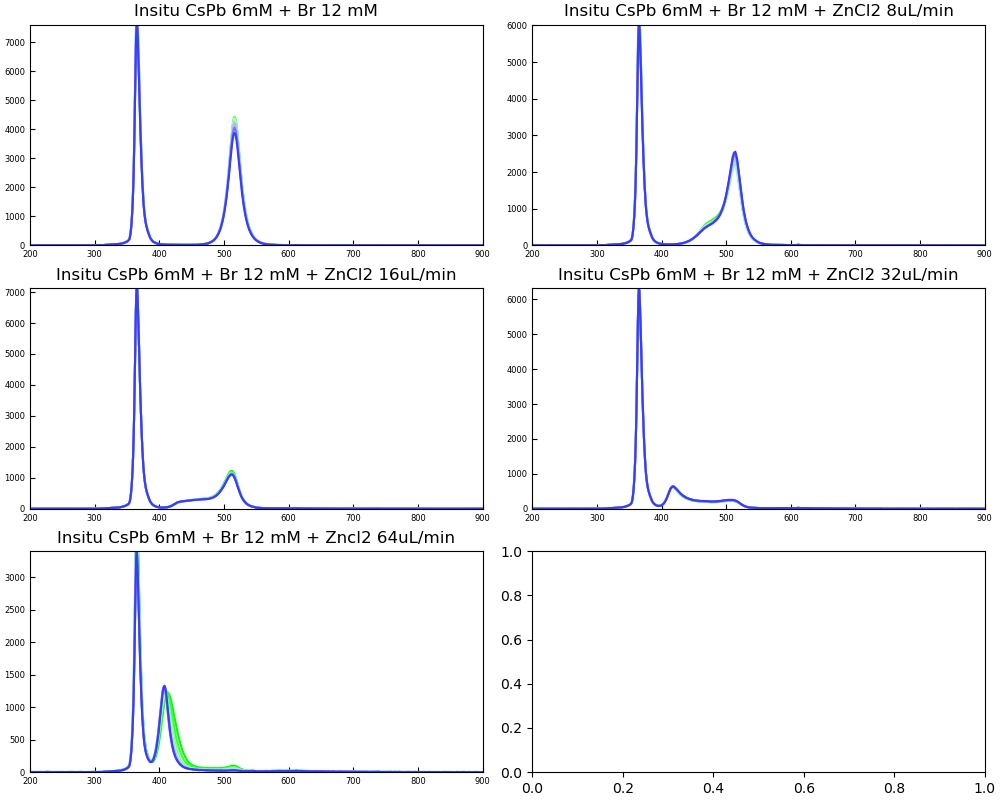

In [8]:
## Plot All PL profiles in each subfolder
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(3, 2, figsize = (10, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 245
w2 = 600

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i] + '/**PL**.csv')
    data_files.sort()
    del data_files[0]
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    
    color_idx = np.linspace(0, 1, k2-k1+1)
    # color_idx = np.linspace(0, 1, 10)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    
    skiprows=10
    
    for j in range(k1, k2):
        # df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        df_j = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
        PL = df_j['Sample']-dark_df.Sample
        ax1[i].plot(df_j.Energy, PL, color=cmap(color_idx[j-k1]))
        ax1[i].set_xlim(200, 900)
        ax1[i].set_ylim(-0.1, max(PL[100:800])+0.2)
        ax1[i].tick_params(axis='both', direction='in', labelsize=6)
        
        ## Insert Annotation
        '''
        at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
        ax1[i].add_artist(at)
        '''
        
        #df_i[f'Iten_{j}'] = df_j.intensity
        df_i = pd.concat([df_i, PL], axis=1, ignore_index=True)
    
    df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)
    #df_norm[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1) / df_i.mean(axis=1).sum(axis=0)
    df_norm[f'{os.path.basename(subfolder[i])}']= df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2] / df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].sum(axis=0)
    
    
    x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

    
df['Energy'] = df_j.Energy
df_norm['Energy'] = df_j.Energy.loc[w1:w2]
#df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
df_norm2.loc[0:w2-w1, 'Energy'] = df_j.Energy.loc[w1:w2].values

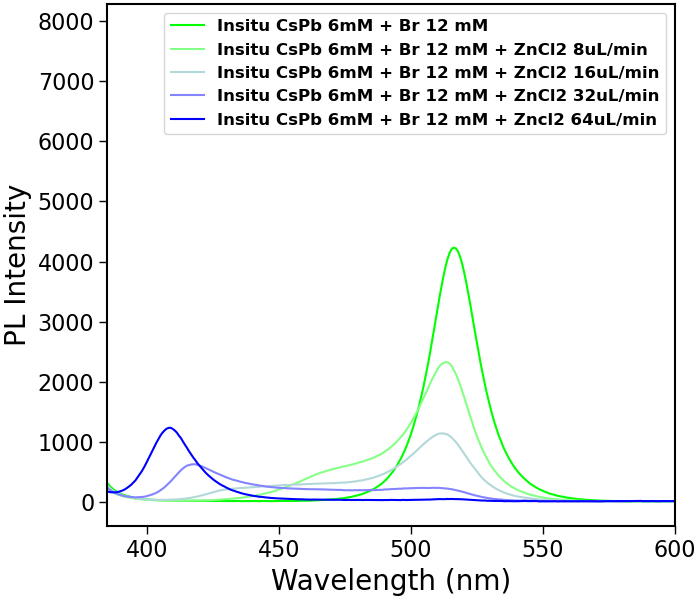

In [9]:
## Plot average PL profiles in each subfolder
f2, ax2 = plt.subplots(1, 1, figsize = (7, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax2.plot(df.Energy, getattr(df, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=title[i])

legend_properties = {'weight':'bold', 'size':12}    
ax2.legend(fontsize=legendsize, prop=legend_properties)

ax2.set_xlim(385, 600)
# ax2.set_ylim(-0.05, 1.4)
ax2.set_xlabel('Wavelength (nm)', fontsize=20, fontweight='regular')
ax2.set_ylabel('PL Intensity', fontsize=20, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=16, size=6, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221121_PL_CsPbBr_02.png'
# plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=True)

## Test good_bad_data in _data_analysis.py

In [15]:
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

In [11]:
df

,CsPbBr_200uL_Cl_0,CsPbBr_200uL_Cl_08,CsPbBr_200uL_Cl_16,CsPbBr_200uL_Cl_32,CsPbBr_200uL_Cl_64,Energy
0,1.027778,0.796296,0.867284,1.327160,1.123457e+00,196.262863
1,-0.219136,0.006173,-0.169753,-0.709877,-2.098765e-01,197.066232
2,0.496914,0.129630,0.348765,0.290123,-2.469136e-02,197.869529
3,-0.540123,-0.376543,-0.330247,-0.339506,-7.407407e-02,198.672754
4,0.780864,1.129630,0.842593,1.018519,8.395062e-01,199.475907
...,...,...,...,...,...,...
1039,0.200617,0.475309,-0.145062,0.067901,5.921189e-16,989.418604
1040,0.632716,0.771605,0.521605,0.524691,2.222222e-01,990.139347
1041,0.632716,0.524691,0.743827,0.685185,5.555556e-01,990.860002
1042,-0.959877,-0.796296,-1.145062,-0.907407,-9.876543e-01,991.580571


In [12]:
df.iloc[:,3]

0       1.327160
1      -0.709877
2       0.290123
3      -0.339506
4       1.018519
          ...   
1039    0.067901
1040    0.524691
1041    0.685185
1042   -0.907407
1043   -0.870370
Name: CsPbBr_200uL_Cl_32, Length: 1044, dtype: float64

In [33]:
good_bad_data(df.Energy, df['CsPbBr_200uL_Cl_32'], key_height=2000)

Spectra test is bad due to a low peak height (c1).


False

In [34]:
a,peak, prop = good_bad_data(df.Energy, df['CsPbBr_200uL_Cl_32'], key_height=200, distance=50, height=100)

Spectra test passes c1 so is good.


In [35]:
a

True

In [36]:
peak

array([212, 279, 332, 396])

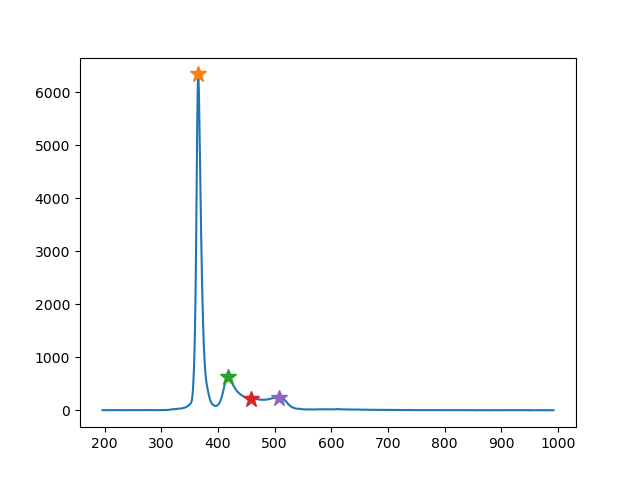

In [37]:
plt.figure()
plt.plot(df.Energy, df['CsPbBr_200uL_Cl_32'])
for i in peak:
    plt.plot(df.Energy[i], df['CsPbBr_200uL_Cl_32'][i], '*', markersize=12)

In [ ]:
## Plot Normalized (by Max-min) PL profiles in each subfolder
f5, ax5 = plt.subplots(1, 1, figsize = (8, 6))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
label = title
k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax5.plot(df_norm2.Energy, getattr(df_norm2, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':12}    
# ax5.legend(prop=legend_properties)

ax5.set_xlim(385, 550)
ax5.set_ylim(-0.05, 1.4)
ax5.set_xlabel('Wavelength (nm)', fontsize=16, fontweight='regular')
ax5.set_ylabel('PL Intensity Norm.', fontsize=16, fontweight='regular')
ax5.tick_params(axis='both', direction='out', labelsize=16, size=4, width=1)
spinewidth = 1.5
ax5.spines["bottom"].set_linewidth(spinewidth)
ax5.spines["right"].set_linewidth(spinewidth)
ax5.spines["top"].set_linewidth(spinewidth)
ax5.spines["left"].set_linewidth(spinewidth)

imag_name = '20221121_PL_CsPbBr_Cl_02.png'
# plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=True)